당뇨병 data를 이용한 선형회귀
Dataset : sklearn.datasets.load_diabetes()
Feature : 나이, 성별, bmi, 혈압, 6가시 혈청 수치 -> Scaling 되어있음
Target : 1년 뒤 측정한 당뇨병의 진행률
Model : linear_model.LinearRegression()
평가기준1 : RMSE (Root Mean Squared Error) -> sklearn.metrics.mean_squared_error

Univerate Linear Regression (단변수 선형회귀)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dia = datasets.load_diabetes()
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
print(dia.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
print(dia.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [6]:
#변수명
dia.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
dia.data.shape

(442, 10)

In [9]:
dia.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [10]:
dia.target.shape

(442,)

In [12]:
df = pd.DataFrame(dia.data, columns=dia.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


univariate linear regression data 생성

In [18]:
#reshape 할 때 -1을 넣어주면 numpy에게 값을 알아서 넣어달라는 뜻임 그러고 일단 metrix 형태로 만들어야 하기 때문에 reshape을 해준다
dia_X = df['bmi'].values.reshape(-1,1)
dia_X.shape

(442, 1)

In [17]:
dia_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [21]:
#dia_X_train의 경우 앞에서부터 20개
#dia_X_test의 경우 뒤에서부터 20개

dia_X_train = dia_X[:-20]
dia_X_test = dia_X[-20:]
dia_X_train.shape, dia_X_test.shape

((422, 1), (20, 1))

In [22]:
#여기서 dia_Y값은 우리가 위에서 실제로 받아놓은 결과값을 의미한다

dia_Y_train = dia.target[:-20]
dia_Y_test = dia.target[-20:]
dia_Y_train.shape, dia_Y_test.shape

((422,), (20,))

sklearn model 이용

In [23]:
regr = linear_model.LinearRegression()
regr.fit(dia_X_train, dia_Y_train)

LinearRegression()

In [24]:
regr.coef

AttributeError: 'LinearRegression' object has no attribute 'coef'

In [25]:
#기울기
regr.coef_

array([938.23786125])

In [27]:
#절편
regr.intercept_

152.91886182616113

In [28]:
#예측값

y_pred = regr.predict(dia_X_test)
y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [29]:
# 정답값

dia_Y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

시각화 하기

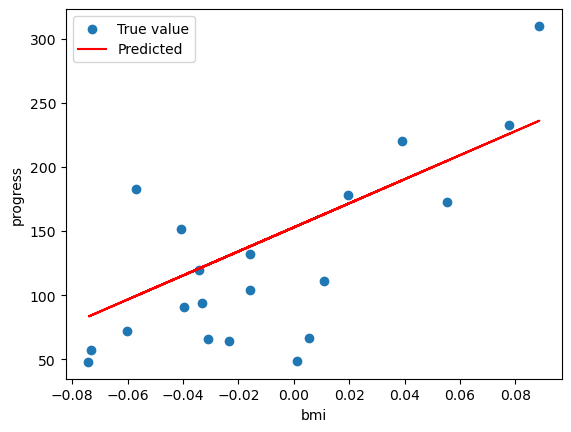

In [36]:
#이건 점으로 이루어진 값
plt.scatter(dia_X_test, dia_Y_test, label="True value")
#이건 선으로 이루어진 값
plt.plot(dia_X_test, y_pred, color="r", label="Predicted")

plt.xlabel("bmi")
plt.ylabel("progress")
plt.legend()

R2 계산 (우리가 예측한 값이 얼마나 일치하는지 파악하기)
1에 가까울 수록 우리가 예측한 값이 정확하다는 것을 의미함

In [40]:
#0.47이 나옴
#r2_score(정답, 예측값)
r2_score(dia_Y_test, y_pred)

0.4725754479822716

In [41]:
#mean_squared_error(정답, 예측값)
mean_squared_error(dia_Y_test, y_pred)

2548.072398725969

Mulivariate Linear Regression (다변수 선형회귀)

In [42]:
dia_X = df[['bmi', 'bp']].values
dia_X.shape

(442, 2)

In [43]:
dia_X_train = dia_X[:-20]
dia_X_test = dia_X[-20:]
dia_X_train.shape, dia_X_test.shape

((422, 2), (20, 2))

In [44]:
dia_Y_train = dia.target[:-20]
dia_Y_test = dia.target[-20:]
dia_Y_train.shape, dia_Y_test.shape

((422,), (20,))

In [45]:
regr = linear_model.LinearRegression()
regr.fit(dia_X_train, dia_Y_train)

LinearRegression()

In [46]:
#예측값

y_pred = regr.predict(dia_X_test)
y_pred

array([235.36697546, 133.70920418, 153.51228658,  87.68118965,
       144.03322796, 154.95075839, 257.90718917, 117.5799822 ,
        87.76041218, 137.62073219, 193.68078385,  93.70692672,
       157.23118727, 118.0972744 ,  74.28909897, 192.72542198,
       112.69445956, 147.53008573, 183.87555632,  62.42247739])

In [47]:
r2_score(dia_Y_test, y_pred)

0.4653965038413407

In [49]:
dia_X = df.values
dia_X.shape

(442, 10)

In [52]:
dia_X_train = dia_X[:-20]
dia_X_test = dia_X[-20:]
dia_X_train.shape, dia_X_test.shape

((422, 10), (20, 10))

In [53]:
dia_Y_train = dia.target[:-20]
dia_Y_test = dia.target[-20:]
dia_Y_train.shape, dia_Y_test.shape

((422,), (20,))

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(dia_X_train, dia_Y_tr)